In [1]:
# Load required libraries 
import os
import csv
import zipfile
import string
import pandas as pd
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
%matplotlib inline

In [2]:
# Load the data
fullpath = "..\\Datasets\\Final_Data\\Calls_for_Service_Cleaned.csv"
df_cfs = pd.read_csv(fullpath, sep=',')

In [3]:
df_cfs.head()

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,CrimeType,Description,Latitude,Longitude
0,A0026112,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3680346,531912,2012-01-01 01:44:00,...,NaN,8D02,002XX N Rampart St,70112.0,8,"(29.956608537919635, -90.07170060793311)",VIOLENT CRIME,SIMPLE ROBBERY,29.956609,-90.071701
1,A0139412,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3682307,529905,2012-01-01 20:04:00,...,NaN,8B01,003XX Canal St,70130.0,8,"(29.951030452997887, -90.06557853022184)",VIOLENT CRIME,SIMPLE ROBBERY,29.951030,-90.065579
2,A0163512,65,SIMPLE ROBBERY,2B,NaN,NaN,NaN,3682519,532977,2012-01-02 00:13:00,...,NaN,8E01,008XX Bourbon St,70116.0,8,"(29.9594709577918, -90.06480175675452)",VIOLENT CRIME,SIMPLE ROBBERY,29.959471,-90.064802
3,A0195712,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3669570,518651,2012-01-02 09:12:00,...,NaN,2F04,009XX Bordeaux St,70115.0,2,"(29.92046691792707, -90.1061762712039)",VIOLENT CRIME,SIMPLE ROBBERY,29.920467,-90.106176
4,A0248912,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3692359,543219,2012-01-02 17:25:00,...,NaN,5Q02,030XX Morrice Duncan Dr,70126.0,5,"(29.987329613283705, -90.03336254702)",VIOLENT CRIME,SIMPLE ROBBERY,29.987330,-90.033363


In [4]:
df_cfs.columns

Index([u'NOPD_Item', u'Type_', u'TypeText', u'Priority', u'InitialType',
       u'InitialTypeText', u'InitialPriority', u'MapX', u'MapY', u'TimeCreate',
       u'TimeDispatch', u'TimeArrive', u'TimeClosed', u'Disposition',
       u'DispositionText', u'SelfInitiated', u'Beat', u'BLOCK_ADDRESS', u'Zip',
       u'PoliceDistrict', u'Location', u'CrimeType', u'Description',
       u'Latitude', u'Longitude'],
      dtype='object')

In [5]:
# Drop unnecesary columns
colnames = ['Priority','Type_','TypeText','Location','BLOCK_ADDRESS','InitialType','PoliceDistrict','InitialTypeText','InitialPriority','MapX','MapY','Disposition','DispositionText','SelfInitiated', 'CrimeType']
df_cfs = df_cfs.drop(colnames, axis = 1)

In [6]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363


In [7]:
set(df_cfs.Description)

{'AGGRAVATED ASSAULT',
 'AGGRAVATED ASSAULT DOMESTIC',
 'AGGRAVATED BATTERY',
 'AGGRAVATED BATTERY BY KNIFE',
 'AGGRAVATED BATTERY BY SHOOTING',
 'AGGRAVATED BATTERY DOMESTIC',
 'AGGRAVATED CRIMINAL DAMAGE',
 'AGGRAVATED RAPE',
 'AGGRAVATED RAPE MALE VICTIM',
 'ARMED ROBBERY',
 'ARMED ROBBERY WITH GUN',
 'ARMED ROBBERY WITH KNIFE',
 'CARJACKING',
 'CARJACKING- NO WEAPON',
 'HOMICIDE',
 'HOMICIDE BY CUTTING',
 'HOMICIDE BY SHOOTING',
 'HOMICIDE DOMESTIC',
 'ORAL SEXUAL BATTERY',
 'SIMPLE RAPE',
 'SIMPLE RAPE MALE VICTIM',
 'SIMPLE ROBBERY'}

In [8]:
# Convert column type to datetime
df_cfs.TimeCreate = pd.to_datetime(df_cfs.TimeCreate)

In [9]:
len(df_cfs)

13927

In [10]:
df_cfs['DOW'] = df_cfs.TimeCreate.dt.dayofweek
df_cfs['Month'] = df_cfs.TimeCreate.map(lambda x: x.month)
df_cfs['DOM'] = df_cfs.TimeCreate.map(lambda x: x.day)
df_cfs['Year'] = df_cfs.TimeCreate.map(lambda x: x.year)
df_cfs['Hour'] = df_cfs.TimeCreate.map(lambda x: x.hour)

In [11]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude,DOW,Month,DOM,Year,Hour
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701,6,1,1,2012,1
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579,6,1,1,2012,20
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802,0,1,2,2012,0
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176,0,1,2,2012,9
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363,0,1,2,2012,17


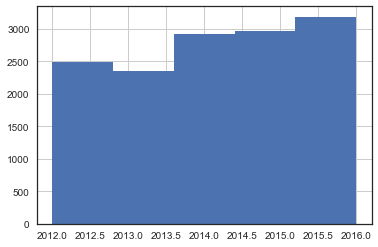

In [12]:
df_cfs.Year.hist(bins=5)

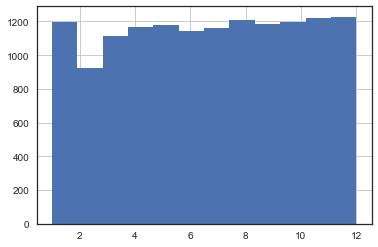

In [13]:
df_cfs.Month.hist(bins=12)

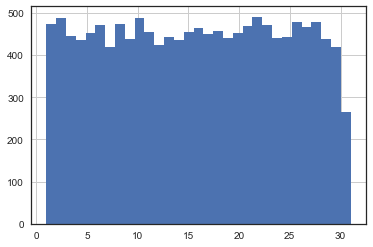

In [14]:
df_cfs.DOM.hist(bins=31)

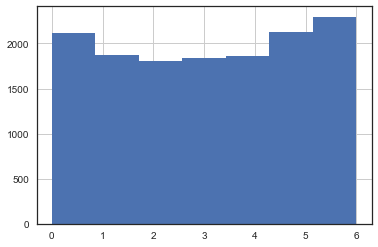

In [15]:
df_cfs.DOW.hist(bins=7)

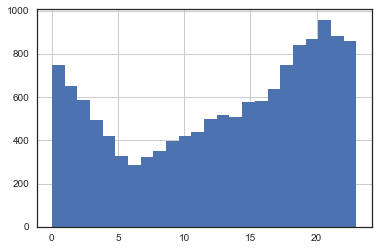

In [16]:
df_cfs.Hour.hist(bins=24)